<a href="https://colab.research.google.com/github/MauricioTellezNava/improving_cyclistic-s_sales/blob/main/proyecto/Ciclystic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ciclystic**


## **Preguntar**

**Tres preguntas guiarán el futuro programa de marketing:**
1.	¿En qué se diferencian los socios anuales y los ciclistas ocasionales con respecto al uso de las bicicletas de Cyclistic?
2.	¿Por qué los ciclistas ocasionales comprarían membresías anuales de Cyclistic?
3.	¿Cómo puede usar Cyclistic los medios digitales para influenciar a los ciclistas ocasionales a convertirse en miembros?

**Crearás un informe con los siguientes entregables:**
1.	Una instrucción clara de la tarea empresarial
2.	Una descripción de todas las fuentes de datos utilizadas
3.	Documentación de todas las limpiezas y manipulaciones de datos
4.	Un resumen de tu análisis
5.	Visualizaciones de respaldo y hallazgos clave
6.	Las tres recomendaciones más importantes basadas en tu análisis

## **Objetivo principal**

* Proponer tres estrategias de márketing orientadas a maximizar el número de usuarios con membresías anuales de Cyclistic.

## **Objetivos especificos**

* Crear un respaldo para los archivos originales
* Unir todos los registros de los últimos 12 meses de datos sobre viajes. 
* Crear una columna para los meses
* Crear una columna que se llame “ride_length”. Calcula la extensión de cada viaje restando la columna “started_at” de la columna “ended_at” (por ejemplo, =D2-C2) y usa el formato HH:MM:SS mediante Formato > Celdas > Hora > 37:30:55.
* Crear una columna llamada “day_of_week” y calcula el día de la semana en el que empezó cada viaje mediante el comando “WEEKDAY” (por ejemplo, =WEEKDAY(C2,1)) en cada archivo. Utiliza el formato General o número sin decimales, observa que 1 = domingo y 7 = sábado.


**Tareas de análisis**

1.	Consolida tus datos para que sean útiles y accesibles.
2.	Organiza y formatea tus datos.
3.	Realiza cálculos.
4.	Identifica tendencias y relaciones.


## **Entregar** 

* Una descripción de todas las fuentes de datos utilizadas.
* Documentación de todas las limpiezas y manipulaciones de datos.
* Un resumen de tu análisis


In [1]:
!pip install jupyter-dash 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 1.1 MB/s 
     |████████████████████████████████| 357 kB 41.4 MB/s 
     |████████████████████████████████| 1.6 MB 37.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=978a979125f641fd3a2754616745c8e9177ee6d1c19cd66dc5b170b9536df67a
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [2]:
from jupyter_dash import JupyterDash # Versión de dash para notebooks
from dash import dcc # Componentes HTML preconstruidos para dashboards
from dash import html # Componentes HTML nativos
from dash.dependencies import Input, Output # Clases Input y Output
import plotly.express as px # Generar gráficas e importar datasets con Plotly
import plotly.graph_objs as go

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
total_viajes = pd.read_csv("/content/drive/MyDrive/Proyectos/Cyclistic/total_viajes.csv")
total_viajes = total_viajes.drop(columns=["Unnamed: 0"])

In [6]:
total_viajes.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [7]:
total_viajes.tail(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5828232,7CCAF5D6E88E45C0,electric_bike,2022-09-04 11:39:37,2022-09-04 11:50:55,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.984112,-87.660269,41.965221,-87.658139,member
5828233,AF9A129D9AFAA40B,electric_bike,2022-09-28 13:42:45,2022-09-28 13:52:59,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.974921,-87.692735,41.965221,-87.658139,member
5828234,60B56F4897429FCE,electric_bike,2022-09-01 20:07:04,2022-09-01 20:18:01,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.974902,-87.692650,41.965221,-87.658139,member


## Análisis exploratorio 

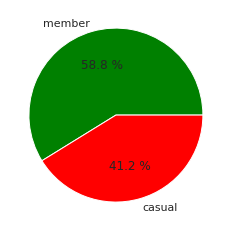

In [8]:
conteo_miembros = total_viajes["member_casual"].value_counts()
etiquetas = total_viajes["member_casual"].unique()
colores = ["green", "red"]

plt.pie(conteo_miembros, labels = etiquetas, autopct="%.1f %%", colors=colores)
plt.show()

In [9]:
trips = total_viajes

In [10]:
trips.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

## 1) Direcciones más frecuentes

In [11]:
trips["direction"] = ("from " + trips["start_station_name"] + " to " + trips["end_station_name"])


In [12]:
# Las diez trayectorias mas frecuentes
trips["direction"].value_counts().head(5)

from Streeter Dr & Grand Ave to Streeter Dr & Grand Ave                        12144
from DuSable Lake Shore Dr & Monroe St to DuSable Lake Shore Dr & Monroe St     7307
from Ellis Ave & 60th St to University Ave & 57th St                            6610
from University Ave & 57th St to Ellis Ave & 60th St                            6280
from Ellis Ave & 60th St to Ellis Ave & 55th St                                 6109
Name: direction, dtype: int64

In [13]:
fig = px.bar(trips["direction"].value_counts().head(5), x="direction", template="plotly_dark", title='Principales trayectorias de los usuarios')
fig.show()

## 2) Creando la columna "ride_length".  Calcula la extensión de cada viaje restando la columna “started_at” de la columna “ended_at” (por ejemplo, =D2-C2) y usa el formato HH:MM:SS mediante Formato > Celdas > Hora > 37:30:55.

In [14]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5828235 entries, 0 to 5828234
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  direction           object 
dtypes: float64(4), object(10)
memory usage: 622.5+ MB


In [15]:
trips["started_at"] = pd.to_datetime(trips["started_at"])
trips["ended_at"] = pd.to_datetime(trips["ended_at"])
trips["ride_length"] = trips["ended_at"]-trips["started_at"]

In [16]:
trips.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length
count,5.828235e+06,5.828235e+06,5.822391e+06,5.822391e+06,5828235
mean,4.190128e+01,-8.764774e+01,4.190153e+01,-8.764795e+01,0 days 00:19:36.118727539
std,4.704426e-02,3.080241e-02,4.715610e-02,3.041982e-02,0 days 02:49:53.298067975
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,-8 days +19:26:39
25%,4.188103e+01,-8.766201e+01,4.188103e+01,-8.766356e+01,0 days 00:05:56
50%,4.189997e+01,-8.764401e+01,4.190000e+01,-8.764410e+01,0 days 00:10:29
75%,4.193000e+01,-8.762932e+01,4.193000e+01,-8.762952e+01,0 days 00:18:51
max,4.563503e+01,-7.379648e+01,4.237000e+01,-8.730000e+01,28 days 06:25:01


* ### El promedio de la variable "ride_length" es de 19 minutos con 36 segundos
* ### El valor máximo de la variable "ride_length" es de 28 días con 6 horas, 25 minutos y 1 segundo

## 3) Crear una columna llamada “day_of_week” y calcula el día de la semana en el que empezó cada viaje mediante el comando “WEEKDAY” (por ejemplo, =WEEKDAY(C2,1)) en cada archivo. Utiliza el formato General o número sin decimales, observa que 1 = domingo y 7 = sábado

In [17]:
trips["day_of_week"] = trips["started_at"].dt.day_name()

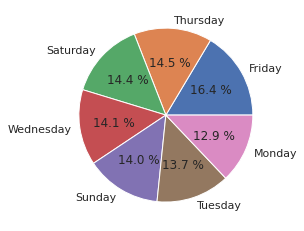

In [18]:
conteo_dias = trips["day_of_week"].value_counts()
etiquetas2 = trips["day_of_week"].unique()

plt.pie(conteo_dias, labels = etiquetas2, autopct="%.1f %%")
plt.show()

## 4) Creando un la variable "month"

In [19]:
trips["month"] = trips["started_at"].dt.month_name()

In [20]:
fig = px.bar(trips["month"].value_counts(), x="month", template="plotly_dark", title='Meses con más viajes')
fig.show()

## 5) Calcular el promedio de ride_length para miembros y para ciclistas ocasionales. Probar rows = member_casual; Values = Average of ride_length


In [21]:
trips_member = trips.groupby("member_casual")
df_member = pd.DataFrame(trips_member["ride_length"].mean())
df_member


,ride_length
member_casual,
casual,0 days 00:29:21.548319109
member,0 days 00:12:45.904311677


## 6) Calcular el promedio de ride_length para usuarios por day_of_week. Probar columns = day_of_week; Rows = member_casual; Values = Average of ride_length

In [22]:
trips_week = trips.groupby(["day_of_week", "member_casual"])
df_week = pd.DataFrame(trips_week["ride_length"].mean())
df_week["day_of_week"] = np.array(df_week.index)
df_week


ride_length          day_of_week
day_of_week member_casual                                               
Friday      casual        0 days 00:28:00.650441122     (Friday, casual)
            member        0 days 00:12:31.702146837     (Friday, member)
Monday      casual        0 days 00:29:43.674751330     (Monday, casual)
            member        0 days 00:12:19.654967657     (Monday, member)
Saturday    casual        0 days 00:32:42.510492070   (Saturday, casual)
            member        0 days 00:14:15.805741234   (Saturday, member)
Sunday      casual        0 days 00:34:21.524017380     (Sunday, casual)
            member        0 days 00:14:12.682575249     (Sunday, member)
Thursday    casual        0 days 00:25:40.764005816   (Thursday, casual)
            member        0 days 00:12:17.635958398   (Thursday, member)
Tuesday     casual        0 days 00:25:48.291899183    (Tuesday, casual)
            member        0 days 00:12:09.739409115    (Tuesday, member)
Wednesday   casual        0 days 00:25:02.047127742  (Wednesday, casual)
            member        0 days 00:12:06.211955653  (Wednesday, member)

## 7) Calcular el número de viajes para usuarios por day_of_week sumando el recuento de trip_id a Values.

In [23]:
conteo_dias

Saturday     958035
Friday       843977
Thursday     837246
Wednesday    820150
Tuesday      817314
Sunday       798664
Monday       752849
Name: day_of_week, dtype: int64

## 8) Explorar diferentes temporadas para hacer algunas observaciones iniciales.